# LSTM (Long Short Term Memory)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.layers import LSTM, Bidirectional, Dense, Input
from keras.losses import MeanSquaredError
from keras.metrics import R2Score
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
sequence = [*range(2, 201, 2)]
sequence_length = 5

In [3]:
def prepare_data(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


X, y = prepare_data(sequence, sequence_length)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
X_train.shape

(76, 5)

In [6]:
X_test.shape

(19, 5)

In [7]:
y_train.shape

(76,)

In [8]:
y_test.shape

(19,)

In [9]:
lstm = Sequential(
    layers=[
        Input(shape=(sequence_length, 1)),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64)),
        Dense(64),
        Dense(32),
        Dense(1),
    ],
    name="lstm",
)

In [10]:
lstm.layers

[<Bidirectional name=bidirectional, built=True>,
 <Bidirectional name=bidirectional_1, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [11]:
lstm.summary()

Model: "lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,977 (558.50 KB)

 Trainable params: 142,977 (558.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
lstm.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[R2Score()])

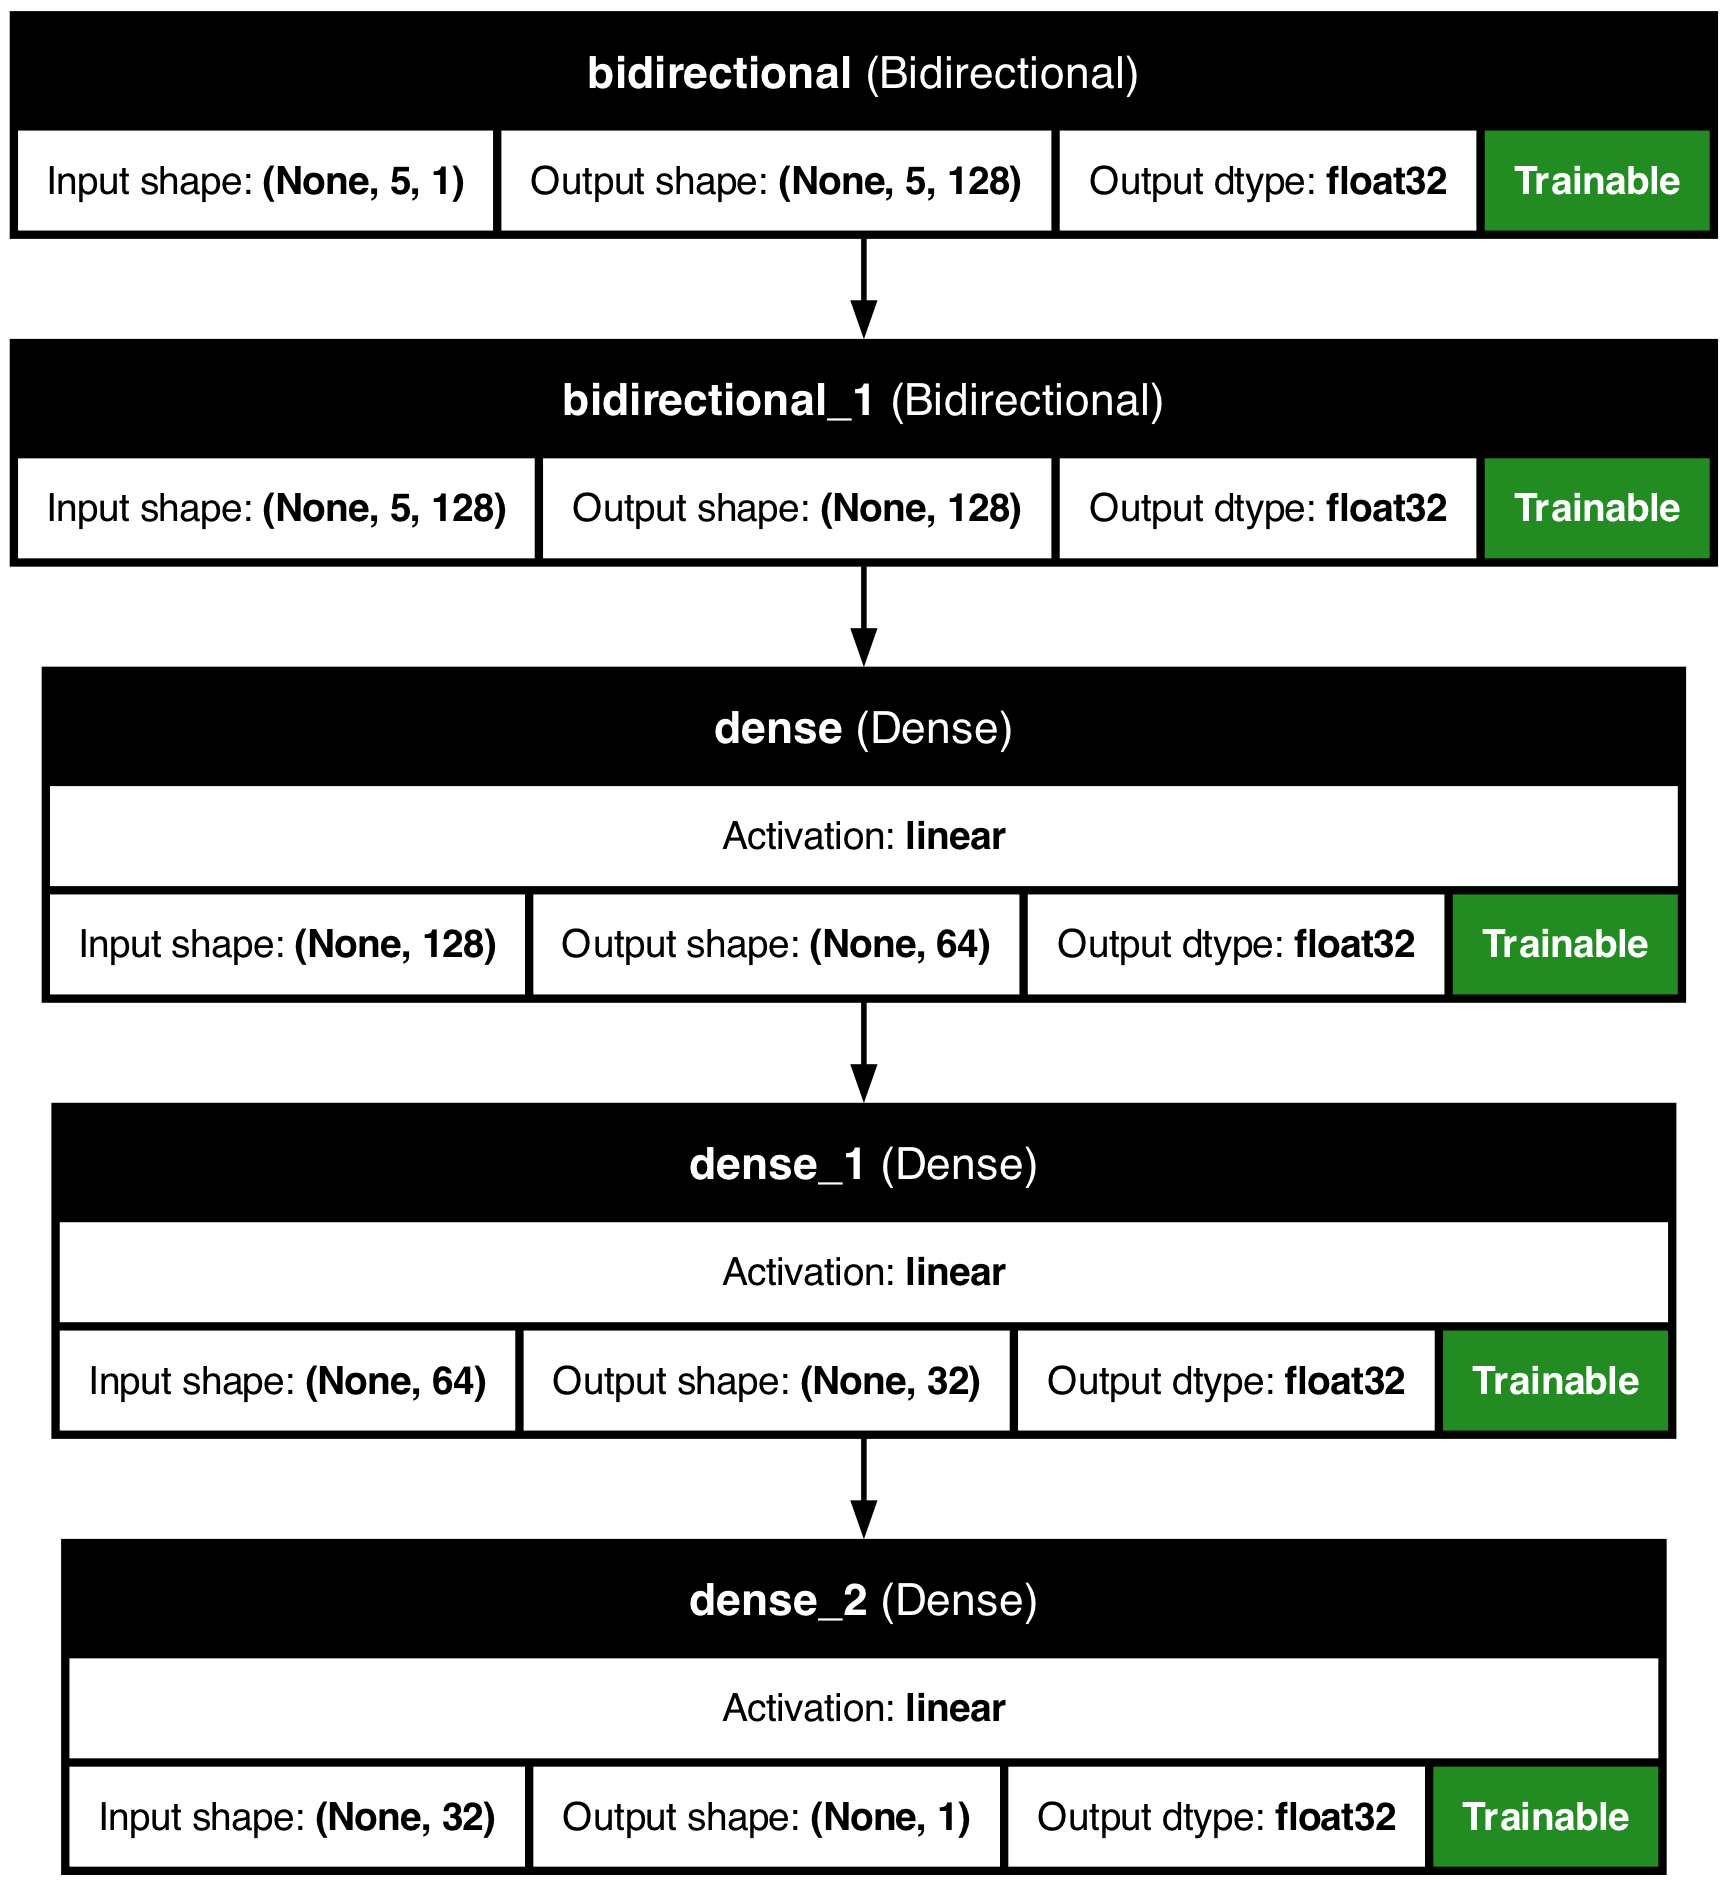

In [13]:
plot_model(
    lstm,
    to_file="Images/lstm_rnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [14]:
rnn_checkpoint_callback = ModelCheckpoint(
    filepath="../../../Models/lstm_rnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
rnn_tensorboard_callback = TensorBoard(
    log_dir="../../../Logs/lstm_rnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/lstm_rnn_logs"

rnn_csvlogger_callback = CSVLogger("../../../Logs/lstm_rnn_logs/lstm_rnn_logs.csv")

lstm_history = lstm.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[
        rnn_checkpoint_callback,
        rnn_tensorboard_callback,
        rnn_csvlogger_callback,
    ],
)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 13818.6221 - r2_score: -3.4960 - val_loss: 14041.6328 - val_r2_score: -5.6474
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 13621.6143 - r2_score: -3.4319 - val_loss: 13827.1738 - val_r2_score: -5.5458
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 13420.3213 - r2_score: -3.3664 - val_loss: 13601.3750 - val_r2_score: -5.4389
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 13208.3096 - r2_score: -3.2974 - val_loss: 13357.1846 - val_r2_score: -5.3233
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 12979.2500 - r2_score: -3.2229 - val_loss: 13090.4160 - val_r2_score: -5.1971
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 12729.2471 - r2_score: -3.1416 - val_loss: 12797.0469 - val_r2_score: -5.0582
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 12454.4492 - r2_score: -3.0522 - val_loss: 12473.9863 - val_r2_score: -4.9052
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181m

In [15]:
lstm_train_loss = lstm_history.history["loss"]
lstm_train_acc = lstm_history.history["r2_score"]
lstm_val_loss = lstm_history.history["val_loss"]
lstm_val_acc = lstm_history.history["val_r2_score"]


print("Training loss:", np.mean(lstm_train_loss))
print("Validation loss:", np.mean(lstm_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(lstm_train_acc), np.std(lstm_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(lstm_val_acc), np.std(lstm_val_acc))
)

Training loss: 2158.1074539712567
Validation loss: 1956.8681289635847
0.297839 Training accuracy with a standard deviation of 1.213522
0.073610 Validation accuracy with a standard deviation of 1.737690


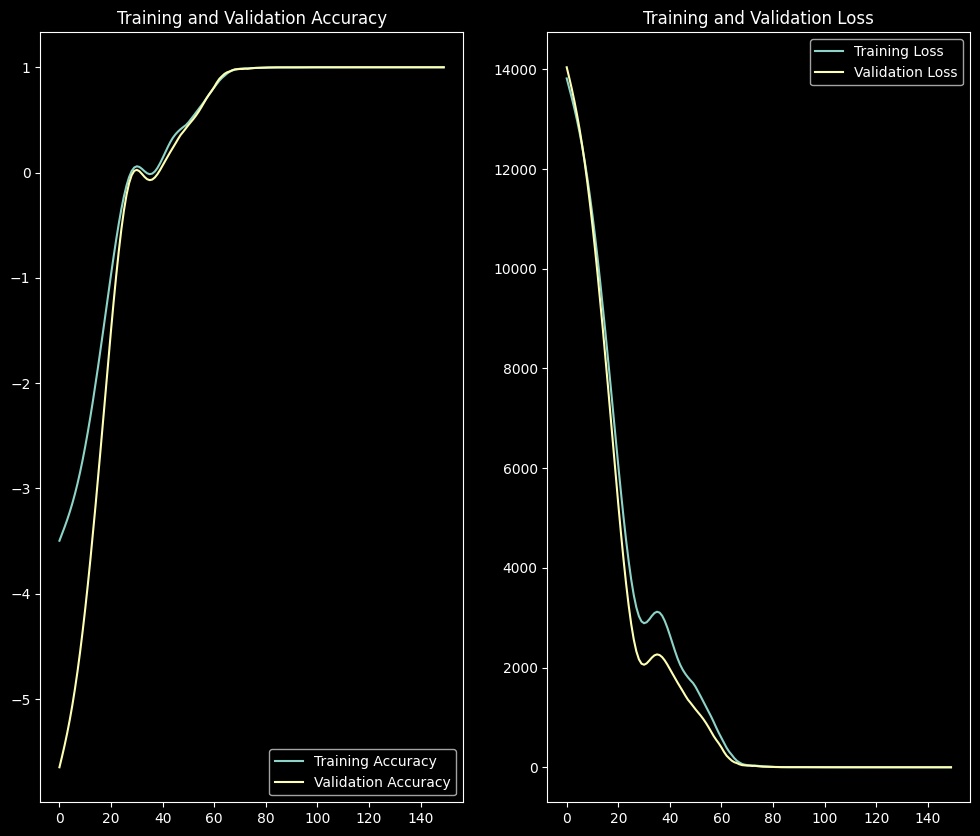

In [16]:
epochs_range = range(150)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, lstm_train_acc, label="Training Accuracy")
plt.plot(epochs_range, lstm_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, lstm_train_loss, label="Training Loss")
plt.plot(epochs_range, lstm_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/lstm_acc_loss.png", bbox_inches="tight")

In [17]:
lstm_test_loss, lstm_test_accuracy = lstm.evaluate(X_test, y_test)
print("Test loss:", lstm_test_loss)
print("Test accuracy:", lstm_test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0586 - r2_score: 1.0000
Test loss: 0.05864324793219566
Test accuracy: 0.9999833703041077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0586 - r2_score: 1.0000
Test loss: 0.05864324793219566
Test accuracy: 0.9999833703041077


In [18]:
prediction = lstm.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
